## Get Tweets

In [1]:
from twitterscraper import query_tweets
from datetime import timedelta, date
import pandas as pd
import csv
import gc
%matplotlib inline

In [9]:
def twitter_query(query, start_date, end_date,limit_per_day=500):
    
    query = query_tweets(query=query, 
                     limit=limit_per_day,
                     begindate=start_date, 
                     enddate=end_date, 
                     poolsize=20, 
                     lang='en')
    
    return query

In [12]:
def create_list(query):    
    tweets = []
    for tweet in query:
        tweets.append({'date': tweet.timestamp, 'text': tweet.text, 
                   'fullname': tweet.fullname, 'id': tweet.id, 
                   'likes': tweet.likes, 'replies': tweet.replies,
                   'retweets': tweet.retweets, 'url': tweet.url,
                   'user': tweet.user})
    return tweets

In [13]:
def add_to_list(query):
    for tweet in query:
        tweets.append({'date': tweet.timestamp, 'text': tweet.text, 
                   'fullname': tweet.fullname, 'id': tweet.id, 
                   'likes': tweet.likes, 'replies': tweet.replies,
                   'retweets': tweet.retweets, 'url': tweet.url,
                   'user': tweet.user})
    return tweets

### Query

In [72]:
query = 'us senate'
start_date = date(2018, 2, 1)
end_date = date(2018, 3, 1)
filename = 'scrape_feb_0117_0318'

query = twitter_query(query, start_date, end_date)

In [73]:
#tweets = create_list(query)

In [74]:
if len(tweets) > 0:
    tweets = add_to_list(query)

## Pre-process Tweets

In [75]:
def pre_process(tweets):
    df = pd.DataFrame(tweets)
    print("Initial dataframe length: ", len(df))
    
    # add timestamp column
    df['month'] = df['date'].apply(lambda x : date(x.year, x.month, 1))
    # drop NAs
    df = df.dropna()
    # drop duplicates
    df = df.drop_duplicates()
    
    df['text'] = df['text'].apply(str)
    
    print("# of Unique ID's: ", len(df.id.unique()))
    print("Final dataframe length: ", len(df))
    return df

In [76]:
df = pre_process(tweets)

Initial dataframe length:  6969
# of Unique ID's:  4191
Final dataframe length:  4192


In [78]:
# drop values outside of queried range
#df = df[df['date'] >= start_date]
#df = df[df['date'] <= end_date]

In [78]:
len(df.id)

4192

### Check that tweets look normal, ready for export

In [79]:
df.sort_values('date').head(3)

,date,fullname,id,likes,replies,retweets,text,url,user,month
6731,2018-02-02 21:45:23,Toni,959543295184547840,0,0,0,You don't make any sense Ken. How could Dr Hir...,/Amadaun23/status/959543295184547840,Amadaun23,2018-02-01
6730,2018-02-02 21:46:10,Cryptomoney Live,959543493235478528,1,1,0,The Noose Tightens? US Senate Meeting with Mar...,/cryptomoney_liv/status/959543493235478528,cryptomoney_liv,2018-02-01
6729,2018-02-02 21:51:46,sheila,959544899841519622,1,0,1,U R part of this corruption used against the A...,/sheila06942158/status/959544899841519622,sheila06942158,2018-02-01


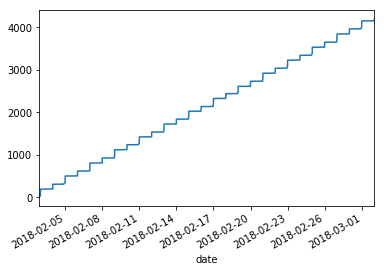

In [80]:
df.groupby('date')['text'].count().cumsum().plot()

In [81]:
df.to_csv('twitter_data/ian_scraped_tweets/'+filename)